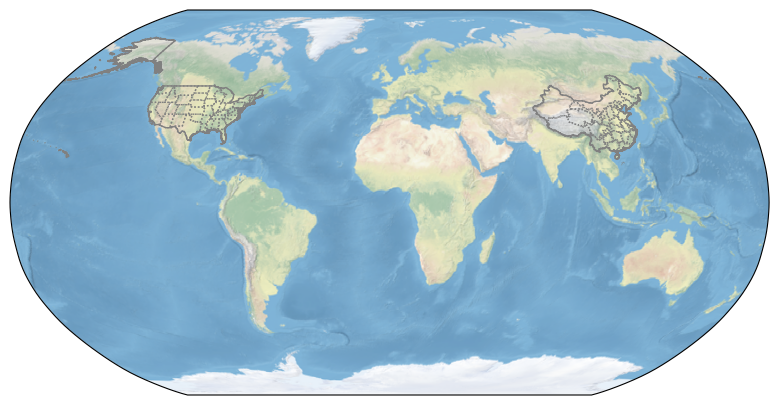

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import geopandas as gpd

# 创建地图
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.set_global()
ax.stock_img()

# 读取Natural Earth shapefile数据
shpfilename = shpreader.natural_earth(resolution='10m',
                                       category='cultural',
                                       name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()

for country in countries:
    if country.attributes['NAME_LONG'] in ['China', 'United States']:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor='none', edgecolor='gray')

# 读取省份边界数据
shpfilename_states = shpreader.natural_earth(resolution='10m',
                                             category='cultural',
                                             name='admin_1_states_provinces')
gdf = gpd.read_file(shpfilename_states)
gdf = gdf[(gdf['admin'] == 'China') | (gdf['admin'] == 'United States of America')]

ax.add_geometries(gdf.geometry, ccrs.PlateCarree(), facecolor='none', edgecolor='gray', linestyle='dotted')

plt.savefig('map.png', dpi=1000)

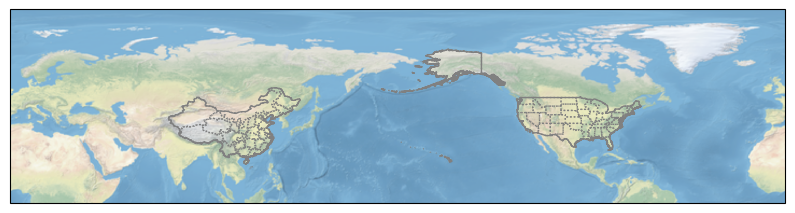

In [4]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import geopandas as gpd

def main():
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))

    # 设置地图的范围，其中经度范围设置为-90到270，纬度范围设置为0到90
    ax.set_extent([-70, 270, 0, 90], ccrs.PlateCarree())

    ax.stock_img()

    # 读取Natural Earth shapefile数据
    shpfilename = shpreader.natural_earth(resolution='10m',
                                          category='cultural',
                                          name='admin_0_countries')
    reader = shpreader.Reader(shpfilename)
    countries = reader.records()

    for country in countries:
        if country.attributes['NAME_LONG'] in ['China', 'United States']:
            ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                              facecolor='none', edgecolor='0.5')  # 使用浅灰色

    # 读取省份边界数据
    shpfilename_states = shpreader.natural_earth(resolution='10m',
                                                 category='cultural',
                                                 name='admin_1_states_provinces')
    gdf = gpd.read_file(shpfilename_states)
    gdf = gdf[(gdf['admin'] == 'China') | (gdf['admin'] == 'United States of America')]

    ax.add_geometries(gdf.geometry, ccrs.PlateCarree(), facecolor='none', edgecolor='0.5', linestyle='dotted')  # 使用浅灰色

    # 保存图像
    plt.savefig('map.png', dpi=600)

if __name__ == '__main__':
    main()

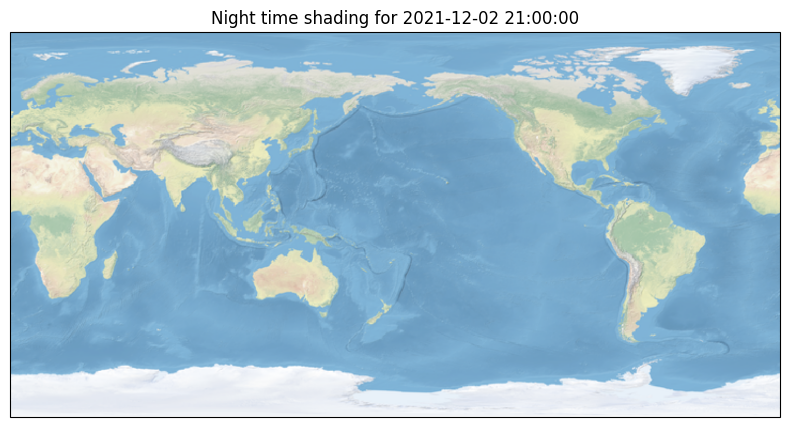

In [5]:
import datetime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.feature.nightshade import Nightshade


fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))

date = datetime.datetime(2021, 12, 2, 21)

ax.set_title(f'Night time shading for {date}')
ax.stock_img()
#ax.add_feature(Nightshade(date, alpha=0.2))
#plt.show()
plt.savefig('map.png', dpi=1200)


/Users/huyanshen/opt/anaconda3/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/huyanshen/opt/anaconda3/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


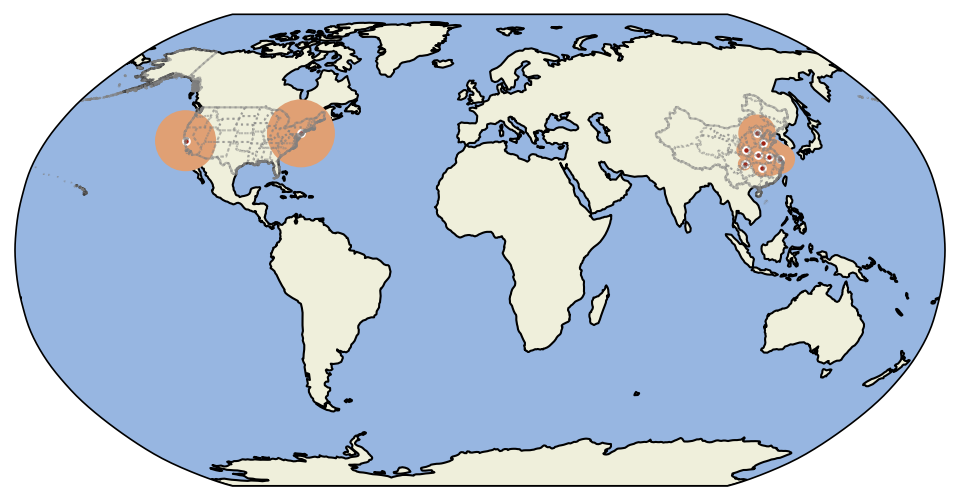

In [6]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import geopandas as gpd
import cartopy.feature as cfeature
import numpy as np

fig = plt.figure(figsize=(8, 8), dpi=150)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

ax.add_feature(cfeature.OCEAN, zorder=-1)
ax.add_feature(cfeature.LAND, zorder=-1, edgecolor='black')

# 读取Natural Earth shapefile数据
shpfilename = shpreader.natural_earth(resolution='10m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()

for country in countries:
    if country.attributes['NAME_LONG'] in ['China', 'United States']:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor='none', edgecolor='0.5',alpha=0.5)  # 使用浅灰色

# 读取省份边界数据
shpfilename_states = shpreader.natural_earth(resolution='10m',
                                             category='cultural',
                                             name='admin_1_states_provinces')
gdf = gpd.read_file(shpfilename_states)
gdf = gdf[(gdf['admin'] == 'China') | (gdf['admin'] == 'United States of America')]

ax.add_geometries(gdf.geometry, ccrs.PlateCarree(), facecolor='none', edgecolor='0.5', linestyle='dotted',alpha=0.5)  # 使用浅灰色

# 地点和病人数量
locations = [('华山医院, 上海, 中国', (121.4580583, 31.2057496)), 
             ('济南, 中国', (113.1201, 32.6512)), 
             ('齐鲁医院, 中国', (117.024967, 36.682784)), 
             ('北京三博脑科医院, 中国', (116.3626, 39.9813)), 
             ('安徽省立医院, 中国', (117.227219, 31.842598)), 
             ('西京医院, 中国', (108.943481, 34.241842)), 
             ('湘雅医院, 中国', (112.98127, 28.193106)), 
             ('重庆, 中国', (106.551556, 29.56301)), 
             ('Stanford Hospital, USA', (-122.175175, 37.433017)), 
             ('Children’s Hospital of Philadelphia, USA', (-75.1932, 39.9496))]
patients = [18, 12, 12, 29, 30, 7, 6, 3, 80, 100]  # 示例病人数量

# 获取每个地点的经纬度和名称
names = [loc[0] for loc in locations]
longitudes = [loc[1][0] for loc in locations]
latitudes = [loc[1][1] for loc in locations]

# 添加气泡
scatter = ax.scatter(longitudes, latitudes, transform=ccrs.PlateCarree(), s=np.array(patients)*10, color=[224/255,160/255,116/255])

# 在每个气泡的中心添加一个红点
red_dots = ax.scatter(longitudes, latitudes, color=[159/255,34/255,20/255], edgecolors='white', s=10, transform=ccrs.PlateCarree())

ax.set_global()
plt.savefig('map.png', dpi=1200)
plt.show()

/var/folders/nj/6hcc0q8x30x74w9dhvw1xz2r0000gn/T/ipykernel_1643/2158529260.py:32: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/Users/huyanshen/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21326 (\N{CJK UNIFIED IDEOGRAPH-534E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/huyanshen/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23665 (\N{CJK UNIFIED IDEOGRAPH-5C71}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/huyanshen/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21307 (\N{CJK UNIFIED IDEOGRAPH-533B}) missing from current font.
  fig.canvas.pri

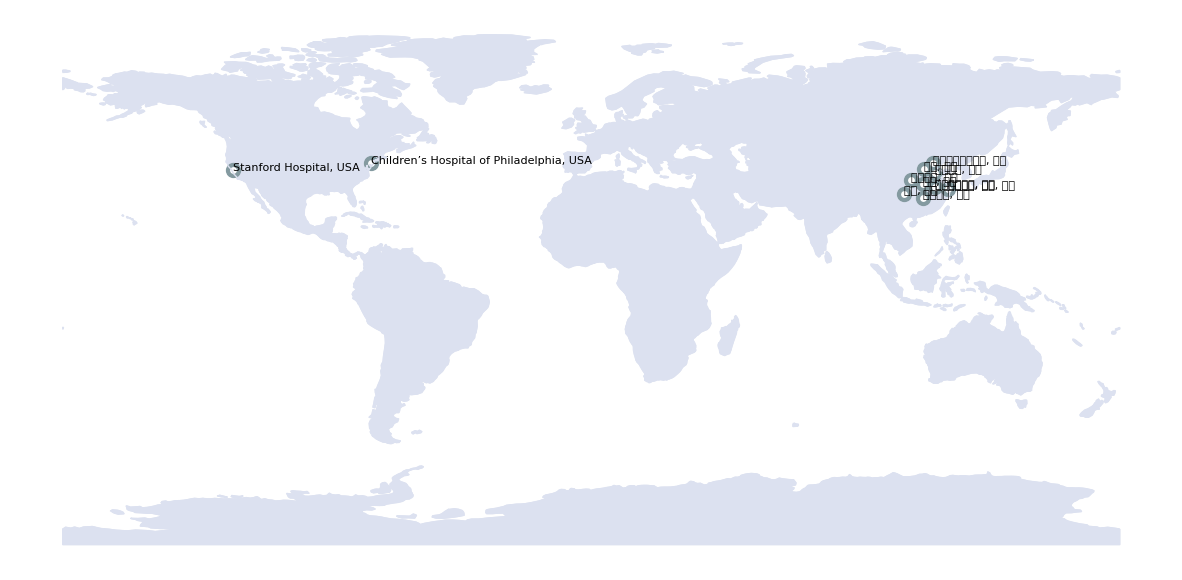

/var/folders/nj/6hcc0q8x30x74w9dhvw1xz2r0000gn/T/ipykernel_1643/2158529260.py:59: UserWarning: Glyph 21326 (\N{CJK UNIFIED IDEOGRAPH-534E}) missing from current font.
  fig.savefig("map.png", dpi=800)
/var/folders/nj/6hcc0q8x30x74w9dhvw1xz2r0000gn/T/ipykernel_1643/2158529260.py:59: UserWarning: Glyph 23665 (\N{CJK UNIFIED IDEOGRAPH-5C71}) missing from current font.
  fig.savefig("map.png", dpi=800)
/var/folders/nj/6hcc0q8x30x74w9dhvw1xz2r0000gn/T/ipykernel_1643/2158529260.py:59: UserWarning: Glyph 21307 (\N{CJK UNIFIED IDEOGRAPH-533B}) missing from current font.
  fig.savefig("map.png", dpi=800)
/var/folders/nj/6hcc0q8x30x74w9dhvw1xz2r0000gn/T/ipykernel_1643/2158529260.py:59: UserWarning: Glyph 38498 (\N{CJK UNIFIED IDEOGRAPH-9662}) missing from current font.
  fig.savefig("map.png", dpi=800)
/var/folders/nj/6hcc0q8x30x74w9dhvw1xz2r0000gn/T/ipykernel_1643/2158529260.py:59: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from current font.
  fig.savefig("map.png", dpi=

In [4]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# 地点和病人数量
locations = [('华山医院, 上海, 中国', (31.2057496,121.4580583)), 
             ('济南, 中国', (32.6512, 113.1201)), 
             ('齐鲁医院, 中国', (36.682784, 117.024967)), 
             ('北京三博脑科医院, 中国', (39.9813, 116.3626)), 
             ('安徽省立医院, 中国', (31.842598, 117.227219)), 
             ('西京医院, 中国', (34.241842, 108.943481)), 
             ('湘雅医院, 中国', (28.193106, 112.98127)), 
             ('重庆, 中国', (29.56301, 106.551556)), 
             ('Stanford Hospital, USA', (37.433017, -122.175175)), 
             ('Children’s Hospital of Philadelphia, USA', (39.9496, -75.1932)),
             ('天坛, 北京', (37.88, 113.40))]
patients = [18, 12, 12, 29, 30, 7, 6, 3, 40,91,577]  # 示例病人数量

# 获取每个地点的经纬度和名称
names = [loc[0] for loc in locations]
latitudes = [loc[1][0] for loc in locations]
longitudes = [loc[1][1] for loc in locations]

# 创建一个 GeoDataFrame
df = pd.DataFrame(
    {'Name': names, 'Latitude': latitudes, 'Longitude': longitudes, 'Patients': patients})
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

# 加载全球地图
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 创建一个 RGB 颜色
rgb_color = [220/255, 225/255, 240/255]
purple=[132/255,154/255,160/255]
# 绘制地图
fig, ax = plt.subplots(1, 1,figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1, color=rgb_color, alpha=1)
world.plot(ax=ax, color=rgb_color, edgecolor=rgb_color, alpha=1)
# 标记地点
scatter = gdf.plot(ax=ax, markersize=100, color=purple)

# 在每个气泡的中心添加一个红点

ax.scatter(df['Longitude'], df['Latitude'], color='white', edgecolors='white',s=15)

# 添加医院名称
for x, y, label in zip(df['Longitude'], df['Latitude'], df['Name']):
    ax.text(x, y, label, fontsize=8)

# 绘制地图


# 删除坐标轴
ax.axis('off')

plt.show()
fig.savefig("map.png", dpi=800)

/var/folders/nj/6hcc0q8x30x74w9dhvw1xz2r0000gn/T/ipykernel_77734/2301906462.py:33: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


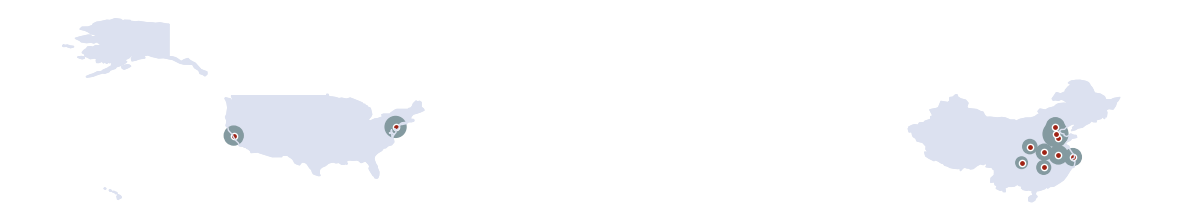

In [2]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import numpy as np

# 地点和病人数量
locations = [('华山医院, 上海, 中国', (31.2057496,121.4580583)), 
             ('济南, 中国', (32.6512, 113.1201)), 
             ('齐鲁医院, 中国', (36.682784, 117.024967)), 
             ('北京三博脑科医院, 中国', (39.9813, 116.3626)), 
             ('安徽省立医院, 中国', (31.842598, 117.227219)), 
             ('西京医院, 中国', (34.241842, 108.943481)), 
             ('湘雅医院, 中国', (28.193106, 112.98127)), 
             ('重庆, 中国', (29.56301, 106.551556)), 
             ('Stanford Hospital, USA', (37.433017, -122.175175)), 
             ('Children’s Hospital of Philadelphia, USA', (39.9496, -75.1932)),
             ('天坛, 北京', (37.88, 116.40))]
patients = [18, 12, 12, 29, 30, 7, 6, 3, 40,91,577]  # 示例病人数量

# 获取每个地点的经纬度和名称
names = [loc[0] for loc in locations]
latitudes = [loc[1][0] for loc in locations]
longitudes = [loc[1][1] for loc in locations]

# 创建一个 GeoDataFrame
df = pd.DataFrame(
    {'Name': names, 'Latitude': latitudes, 'Longitude': longitudes, 'Patients': patients})
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

# 加载全球地图
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 只保留中国和美国的数据
world = world[(world['name'] == 'China') | (world['name'] == 'United States of America')]

# 创建一个 RGB 颜色
rgb_color = [220/255, 225/255, 240/255]
purple=[132/255,154/255,160/255]
# 绘制地图
fig, ax = plt.subplots(1, 1,figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1, color=rgb_color, alpha=1)
world.plot(ax=ax, color=rgb_color, edgecolor=rgb_color, alpha=1)
# 标记地点
scatter = gdf.plot(ax=ax, markersize=np.log1p(gdf['Patients'])*50, color=purple)

# 在每个气泡的中心添加一个红点
ax.scatter(df['Longitude'], df['Latitude'], color=[159/255,34/255,20/255], edgecolors='white',s=20)

# 添加医院名称
#for x, y, label in zip(df['Longitude'], df['Latitude'], df['Name']):
   # ax.text(x, y, label, fontsize=8)

# 删除坐标轴
ax.axis('off')

plt.show()
fig.savefig("map.png", dpi=800)

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap
data=pd.read_excel('data.xlsx')
df_sorted = data.sort_values("max", ascending=False)

# Values for the x axis
ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, len(df_sorted), endpoint=False)

# Cumulative length
LENGTHS = df_sorted["max"].values

# Mean gain length
MEAN_GAIN = df_sorted["mean"].values

# Region label
REGION = df_sorted["hospital"].values

# Number of tracks per region
TRACKS_N = df_sorted["mean"].values
GREY12 = "#1f1f1f"

# Set default font to Bell MT
plt.rcParams.update({"font.family": "Bell MT"})

# Set default font color to GREY12
plt.rcParams["text.color"] = GREY12

# The minus glyph is not available in Bell MT
# This disables it, and uses a hyphen
plt.rc("axes", unicode_minus=False)

# Colors
COLORS = ["#6C5B7B","#C06C84","#F67280","#F8B195"]

# Colormap
cmap = mpl.colors.LinearSegmentedColormap.from_list("my color", COLORS, N=256)

# Normalizer
norm = mpl.colors.Normalize(vmin=TRACKS_N.min(), vmax=TRACKS_N.max())

# Normalized colors. Each number of tracks is mapped to a color in the 
# color scale 'cmap'
COLORS = cmap(norm(TRACKS_N))

fig, ax = plt.subplots(figsize=(9, 12.6), subplot_kw={"projection": "polar"})

# Set background color to white, both axis and figure.
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

ax.set_theta_offset(1.2 * np.pi / 2)
ax.set_ylim(-100, 250)

# Add geometries to the plot -------------------------------------
# See the zorder to manipulate which geometries are on top

# Add bars to represent the cumulative track lengths
ax.bar(ANGLES, LENGTHS, color=COLORS, alpha=0.9, width=0.52, zorder=10)

# Add dashed vertical lines. These are just references
ax.vlines(ANGLES, 0, 300, color=GREY12, ls=(0, (4, 4)), zorder=11)

# Add dots to represent the mean gain
ax.scatter(ANGLES, MEAN_GAIN, s=60, color=GREY12, zorder=11)


# Add labels for the regions -------------------------------------
# Note the 'wrap()' function.
# The '5' means we want at most 5 consecutive letters in a word, 
# but the 'break_long_words' means we don't want to break words 
# longer than 5 characters.
REGION = ["\n".join(wrap(r, 5, break_long_words=False)) for r in REGION]
REGION
# Remove lines for polar axis (x)
ax.xaxis.grid(False)

# Put grid lines for radial axis (y) at 0, 1000, 2000, and 3000
ax.set_yticklabels([])
ax.set_yticks([0, 50, 100, 150,300])

# Remove spines
ax.spines["start"].set_color("none")
ax.spines["polar"].set_color("none")


# Adjust padding of the x axis labels ----------------------------
# This is going to add extra space around the labels for the 
# ticks of the x axis.

ax.set_xticks(ANGLES)
ax.set_xticklabels(REGION, size=12);
fig.savefig("map.png", dpi=1000)

FileNotFoundError: [Errno 2] No such file or directory: 'data.xlsx'

In [3]:
!pip install geopandas

Looking in indexes: https://mirrors.aliyun.com/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 8.6 MB/s eta 0:00:0000:0100:01


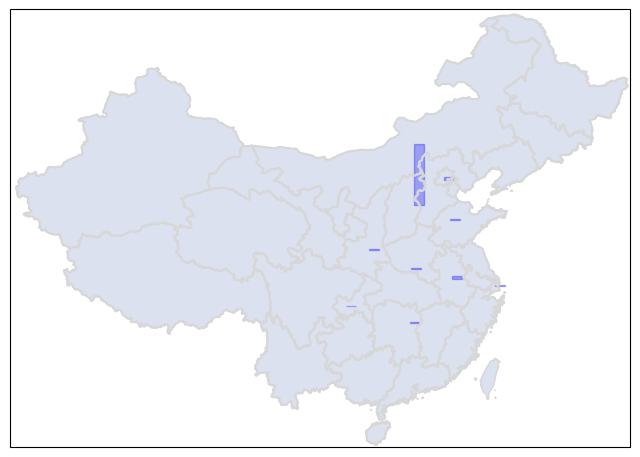

In [33]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.patches import Rectangle
import cartopy.io.shapereader as shpreader
import geopandas as gpd
import numpy as np

# 你的数据
locations = [('华山医院, 上海, 中国', (31.2057496,121.4580583)), 
             ('济南, 中国', (32.6512, 113.1201)), 
             ('齐鲁医院, 中国', (36.682784, 117.024967)), 
             ('北京三博脑科医院, 中国', (39.9813, 116.3626)), 
             ('安徽省立医院, 中国', (31.842598, 117.227219)), 
             ('西京医院, 中国', (34.241842, 108.943481)), 
             ('湘雅医院, 中国', (28.193106, 112.98127)), 
             ('重庆, 中国', (29.56301, 106.551556)), 
             ('Stanford Hospital, USA', (37.433017, -122.175175)), 
             ('Children’s Hospital of Philadelphia, USA', (39.9496, -75.1932)),
             ('天坛, 北京', (37.88, 113.40))]
patients = [18, 12, 12, 29, 30, 7, 6, 3, 40,91,577]

# 载入国家和省级行政区划的数据
shpfilename_countries = shpreader.natural_earth(resolution='10m',
                                                category='cultural',
                                                name='admin_0_countries')
shpfilename_states = shpreader.natural_earth(resolution='10m',
                                             category='cultural',
                                             name='admin_1_states_provinces')
gdf_countries = gpd.read_file(shpfilename_countries)
gdf_states = gpd.read_file(shpfilename_states)

china_and_taiwan = gdf_countries[gdf_countries['ADMIN'].isin(['China', 'Taiwan'])]
china_states = gdf_states[gdf_states['admin'] == 'China']

land_color = [220/255, 225/255, 240/255]
boundary_color = [215/255, 215/255, 215/255]

# 创建地图
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([73, 135, 18, 54])  # 设置地图边界

china_and_taiwan.plot(ax=ax, facecolor=land_color, edgecolor=boundary_color)
china_states.boundary.plot(ax=ax, color=boundary_color)

# 在地图上为每个医院标注病人数目
for (name, (lat, lon)), patient in zip(locations, patients):
    rect = Rectangle((lon, lat), 1, patient/577*5, color="blue",alpha=0.3) 
    ax.add_patch(rect)
    ax.set_xlim([73, 135])
    ax.set_ylim([18, 54])

plt.show()

In [12]:
import geopandas as gpd
import pydeck as pdk
from shapely.geometry import Polygon

# 读取包含国家边界的Shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 选择中国和美国的数据
cn_us = world[(world.name=="China") | (world.name=="United States")]

# 创建一个用于显示国家边界的PolygonLayer
polygon_layer = pdk.Layer(
    'PolygonLayer',
    cn_us,
    get_polygon='geometry',
    get_fill_color=[180, 0, 0, 140],
    pickable=True,
    auto_highlight=True
)

# 创建地图，并添加PolygonLayer
view_state = pdk.ViewState(latitude=35, longitude=110, zoom=1, pitch=40.5, bearing=-27.36)
r = pdk.Deck(layers=[polygon_layer], initial_view_state=view_state)
r.to_html('demo.html')

/var/folders/nj/6hcc0q8x30x74w9dhvw1xz2r0000gn/T/ipykernel_17198/3579192312.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


Looking in indexes: https://mirrors.aliyun.com/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 840.6 kB/s eta 0:00:0000:0100:01
